LAB 4: System Step Response Using Convolution

Part 1

Task 1: Create the following signals using user defined    functions

$$h_{1}(t)=e^{2t}*u*(1-t),$$
$$h_{2}(t)=u*(t-2)-u*(t-6),$$
$$h_{3}(t)=cos(ω_{o}t)*u(t),$$  for $f_{o} = 25Hz$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig 
import math

#Defined unit function
def u(t):
    if t < 0:
        return 0
    if t >= 0:
        return 1
    
#Defined h(t) functions   
def h1(t): 
    a = np.zeros((len(t), 1))
    for i in range(len(t)):
        a[i] = np.exp(2*t[i])*u(1-t[i])
    return a

def h2(t): 
    b = np.zeros((len(t), 1))
    for i in range(len(t)):
        b[i] = u(t[i]-2)-u(t[i]-6)
    return b

def h3(t): 
    f = 0.25
    w = f*2*np.pi
    c = np.zeros((len(t), 1))
    for i in range(len(t)):
        c[i] = math.cos(w*t[i])*u(t[i])
    return c

Task 2: Plot the three functions in a single figure from t=-10 to t=10

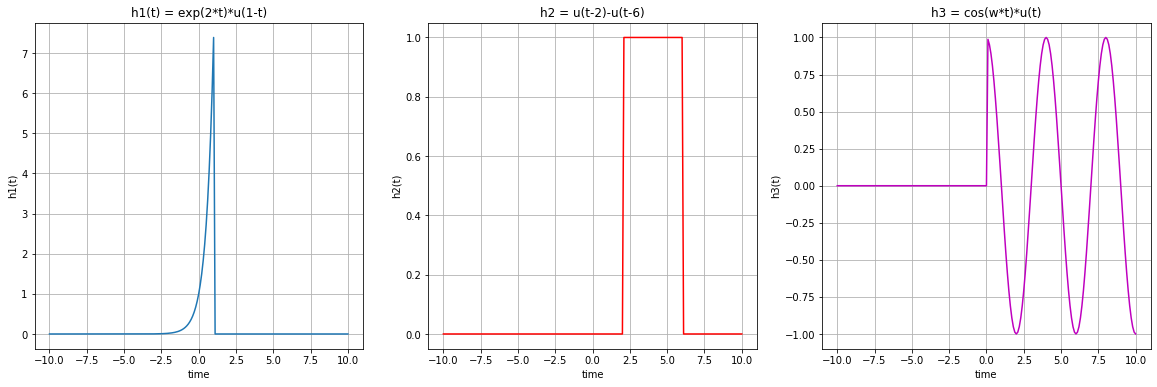

In [18]:
steps = .1
t = np.arange(-10,10+steps,steps)

a = h1(t)
b = h2(t)
c = h3(t)

#Graphs for each h(t) function 
myFigSize = (20,6)
plt.figure(figsize=myFigSize)

plt.subplot(1,3,1)
plt.plot(t,a)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('h1(t)')
plt.title('h1(t) = exp(2*t)*u(1-t)')

plt.subplot(1,3,2)
plt.plot(t,b,'r')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('h2(t)')
plt.title('h2 = u(t-2)-u(t-6)')

plt.subplot(1,3,3)
plt.plot(t,c, 'm')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('h3(t)')
plt.title('h3 = cos(w*t)*u(t)')
plt.show()

Part 2

Task 1: Plot the step response using python to perform the convolution (use the convolution code you developed in
Lab 3).


In [19]:
#Convolution Function (from lab 3)
def my_convo(h1,h2):
    length_h1 = np.size(h1)  #size of first function
    length_h2 = np.size(h2)  #size of second function
    
    #Result with be as large as the added lengths of the functions 
    #-1 because they share t = 0 on the timeline. 
    
    result = np.zeros(length_h1 + length_h2 -1) 

    for m in np.arange(length_h1):       #for any time in the f1,
        for n in np.arange(length_h2):   #take the same time in f2. 
            result[m+n] = result[m+n] + h1[m]*h2[n]  
            #multiply these points and add with previous results.
            #This produces an integral 
            
    return result 

In [20]:
#Function to make unit step an array in order to convolve. 
def vect_u(t):
    y = np.zeros((len(t), 1))
    for i in range(len(t)):
        y[i] = u(t[i])
    return y
    

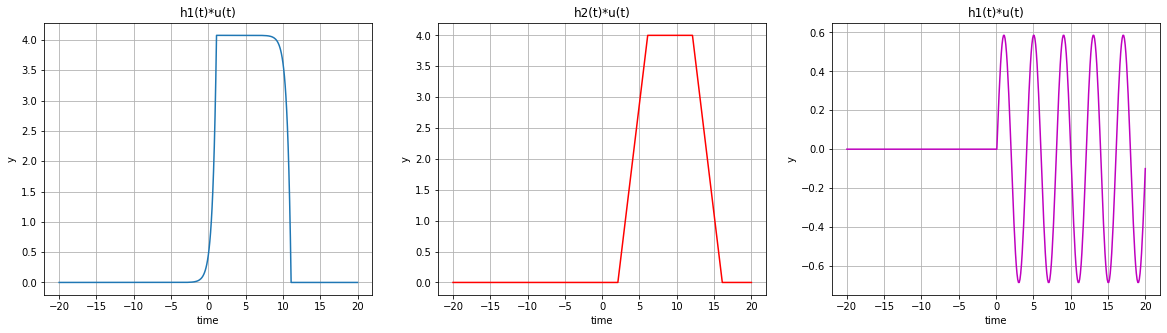

In [21]:
#Graphs for user defined convolution
steps = .1
t = np.arange(-10,10+steps,steps)
NN = len(t)
tExtended = np.arange(-20, 2*t[NN-1]+steps, steps)

a = h1(t)
b = h2(t)
c = h3(t)
y = vect_u(t)

my_conv_1 = my_convo(a,y)
my_conv_2= my_convo(b,y)
my_conv_3= my_convo(c,y)

myFigSize = (20,5)
plt.figure(figsize=myFigSize)

plt.subplot(1,3,1)
plt.plot(tExtended,my_conv_1*steps)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('h1(t)*u(t)')

plt.subplot(1,3,2)
plt.plot(tExtended,my_conv_2*steps,'r')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('h2(t)*u(t)')

plt.subplot(1,3,3)
plt.plot(tExtended,my_conv_3*steps, 'm')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('h1(t)*u(t)')
plt.show()

Task 2:  By hand, calculate the step response of each transfer function by solving the convolution integral. Plot the
results and ensure they match the plots from Task 1.

$$y_{1}(t) = .5*(e^{2*t}*u(1-t)+e^{2}*u(t-1))$$
$$y_{2}(t) = (t-2)*u(t-2)-(t-6)*u(t-6))$$
$$y_{3}(t) = (1/(ω_{o})*sin(ω_{o}*t)*u(t)$$


In [22]:
#Functions for hand calculated convolution
def y1(tExtended): 
    a = np.zeros((len(tExtended), 1))
    
    for i in range(len(tExtended)):
        a[i] = .5*((np.exp(2*tExtended[i])*u(1-tExtended[i]))+(np.exp(2)*u(tExtended[i]-1)))
    return a

def y2(tExtended):   
    b = np.zeros((len(tExtended), 1))
    
    for i in range(len(tExtended)):
        b[i] = ((tExtended[i]-2)*u(tExtended[i]-2))-((tExtended[i]-6)*u(tExtended[i]-6))
    return b

def y3(tExtended): 
    c = np.zeros((len(tExtended), 1)) 
    
    f = 0.25
    w = f*2*np.pi
    c = np.zeros((len(tExtended), 1))
    for i in range(len(tExtended)):
        c[i] = (math.sin(w*tExtended[i])*u(tExtended[i]))/w
    return c

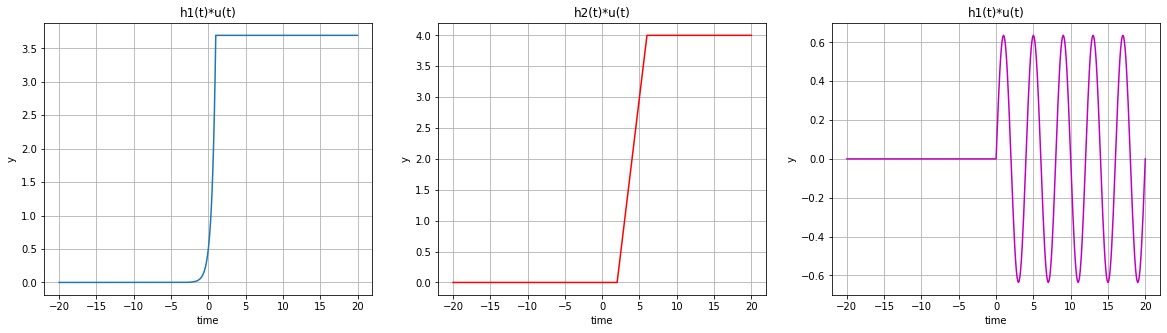

In [23]:
#Graphs for hand calculated convolutions
steps = .1
t = np.arange(-10,10+steps,steps)
NN = len(t)
tExtended = np.arange(-20, 2*t[NN-1]+steps, steps)

a = y1(tExtended)
b = y2(tExtended)
c = y3(tExtended)

myFigSize = (20,5)
plt.figure(figsize=myFigSize)

plt.subplot(1,3,1)
plt.plot(tExtended,a)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('h1(t)*u(t)')

plt.subplot(1,3,2)
plt.plot(tExtended,b,'r')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('h2(t)*u(t)')

plt.subplot(1,3,3)
plt.plot(tExtended,c,'m')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('h1(t)*u(t)')
plt.show()